<a href="https://colab.research.google.com/github/aayeshaqureshi/nlp/blob/main/feature_engineering_handle_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
import requests
url = 'https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv'
res = requests.get(url, allow_redirects=True)
with open('titanic.csv','wb') as file:
    file.write(res.content)
sales_team = pd.read_csv('titanic.csv')

In [4]:
sales_team.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# random sample imputation 
random sample imputation consists of taking random observation from the dataset and we use this observation the NaN values. 




When should it be used?
it assumes that the data is missing completely at random (MCAR)

In [6]:
import pandas as pd
#we will now try to implement random sample on the following three coloumns of the datset 
df= pd.read_csv('titanic.csv',usecols=['Age','Fare', 'Survived'])

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
#let us check for null values 

df.isnull().sum()


Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
#to see the percentage
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
#code to replace all the random values with some sample values 
df['Age'].isnull().sum()
#place this in the next code with some random state 

177

In [15]:
#lets first create some random values in age
# we drop the nan values and use sample function to pick up any random sample values 
#this just replaces the null values with some random values 
# if we just use this fucntion only with sample it replaces only 1 value but here we need to replace 177 values and thats why we place the above code 
#dropna to first remove nan values and then replace those empty spots with randoms 
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)



423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [26]:
#replace the nan values with random sampling and we will also compare with the mean median mode
#this function one varibale is filled with median 
#another variable is filled with randoms
def inpute_nan(df,variable,median):
  df[variable+"_median"]=df[variable].fillna(median)
  #age values are beinf copied inside the random feature
  df[variable+"_random"]=df[variable]
  #from there the values will then be replaces with random_sample
  #below line has the random sample to fill the na
  random_sample= df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  #pandas need to have same index in order to merge the dataset
  random_sample.index= df[df[variable].isnull()].index
  df.loc[df[variable].isnull(), variable+'_random']=random_sample





Understand the above function:
the first line creates a new feature with names as age_median and here all the nan values are replaced by median from df[variable]
the second line creates another feature age_random and replaces it with df[variable] ie df[age]
next line we are getting all the index values and in these indec values we are putting some random data and that is present in random_sample
both the indexes must match so we can merge the random_sample with the orignal df[age_random]
whichever dataframe of age pick up all the indexes store it in random_sample.index
once you pick up all the indexes use the condition that wherever it is null replacr those with the random_sample





In [23]:
#find the median values
median= df.Age.median()

In [18]:
median

28.0

In [27]:

inpute_nan(df, "Age", median)

In [28]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline 


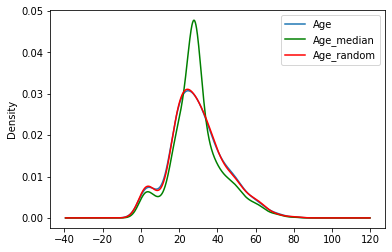

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='green')

df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##advantages
1. easy to implement
2. there is less disortion in variance

##disadvantages 

1. every situation randomness wont work

#Capturing nan values with new features
it works well if the data are not missing completely at random


In [33]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [34]:
df= pd.read_csv('titanic.csv',usecols=['Age','Fare', 'Survived'])

In [35]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
#the best way to debug a code is to execute it line by line


In [37]:
#create a new featir and wherver age has null value put 1 or else 0
import numpy as np
df['Age_NAN']= np.where(df['Age'].isnull(),1,0)



In [45]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [46]:
df.Age.mean()

29.36158249158249

In [47]:
df['Age'].fillna(df.Age.mean(), inplace= True)
#wherever there is 1 that value is replaces with median 
#here we are creating an additional feature to provde importnace to the missingness
#so the model understands


In [48]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [ ]:
#value present-0
#value absent-1


##advantages
1. easy to implement
2. captures the importance of missing values

##disadvantages 

1. creates additional features- may lead to curse of dimentionality 

#End of distribution imputation 
If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.


In [49]:
df= pd.read_csv('titanic.csv',usecols=['Age','Fare', 'Survived'])

In [50]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


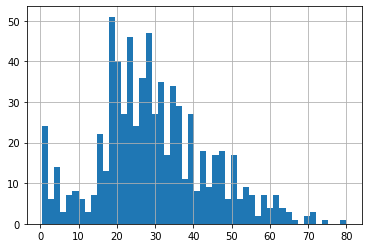

In [51]:
 df.Age.hist(bins=50)
 #take the far end of distributution and replace those nan values with data
 

In [52]:
#how do we do that
df.Age.mean()


29.69911764705882

In [54]:
# we want to pick up the data after the third standard distribution
extreme= df.Age.mean()+3*df.Age.std()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


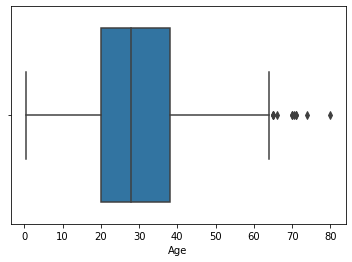

In [55]:
#lets check the outliers
import seaborn as sns
sns.boxplot('Age', data=df)
#the black dots are outliers


In [56]:
def inpute_nan(df, variable, median, extreme):
  #first we will compute end_distribution
  #we create a variable and replace the nan values with extreme values
  df[variable+"_end_distribution"]=df[variable].fillna(extreme)
  #replace nan with median
  df[variable].fillna(median, inplace=True)


In [57]:
inpute_nan(df, 'Age', df.Age.median(),extreme)

In [58]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


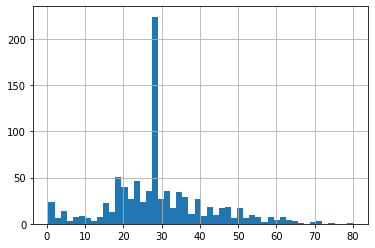

In [59]:
df['Age'].hist(bins=50)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


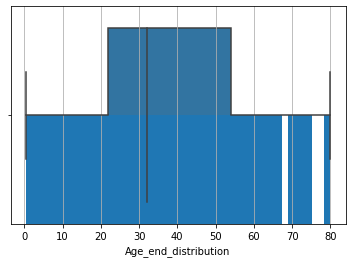

In [61]:
df['Age_end_distribution'].hist(bins=50)
#to check which is better draw boxplot
sns.boxplot('Age_end_distribution', data= df)
#we can see we dont have outliers by using the end of distribution



##advantages
1. easy to implement 
2. captures the importance of missingness if there is one